<a href="https://colab.research.google.com/github/yusufraji/ai-anomaly-detector-ml-1/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [2]:
import re
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [3]:
project_root_dir = Path.cwd() / 'drive' / 'My Drive' / 'applied-data-hackathon' / 'predictive-maintenance'
dataset_root_dir = project_root_dir / 'Transfer'

In [4]:
# df_raw = pd.read_csv(dataset_root_dir/"Auto Bild 3.trace.csv", nrows=500)
# df_raw.head(30)

In [5]:
df = pd.read_csv(dataset_root_dir/"Auto Bild 3.trace.csv", skiprows=29, sep=';', lineterminator='\n', header=None, on_bad_lines="skip")
df = df[[1, 2]].rename(columns={1: "key", 2: "value"})
df["key"] = pd.to_numeric(df["key"], errors='coerce').astype('Int64')

In [6]:
df.head(50)

,key,value
0,18504866,-0.00002
1,18509861,0.00001
2,18514857,0.00002
3,18519857,-0.00001
4,18524866,0.00000
5,18529860,-0.00009
6,18534857,0.00000
7,18539867,-0.00008
8,18544878,-0.00002
9,18549861,0.00011


In [7]:
df[df.isna().any(axis=1)]

,key,value
100000,<NA>,NaN
100001,<NA>,NaN
100002,11,NaN
100003,2,NaN
100004,4278222848,NaN
...,...,...
1700233,0,NaN
1700234,0,NaN
1700235,0,NaN
1700236,0,NaN


In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

key      0
value    0
dtype: int64

In [10]:
# df["key"] = pd.to_datetime(df["key"], unit='s')

In [11]:
df.head(2)

,key,value
0,18504866,-0.00002
1,18509861,0.00001


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800000 entries, 0 to 1800237
Data columns (total 2 columns):
 #   Column  Dtype  
---  ------  -----  
 0   key     Int64  
 1   value   float64
dtypes: Int64(1), float64(1)
memory usage: 42.9 MB


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
key,1800000.0,2.685024e+08,1.443376e+08,1.850487e+07,1.435036e+08,268502364.5,3.935011e+08,5.184999e+08
value,1800000.0,9.669651e+00,1.871375e+01,-1.246200e-01,2.000000e-05,1.0,3.000000e+00,5.104297e+01


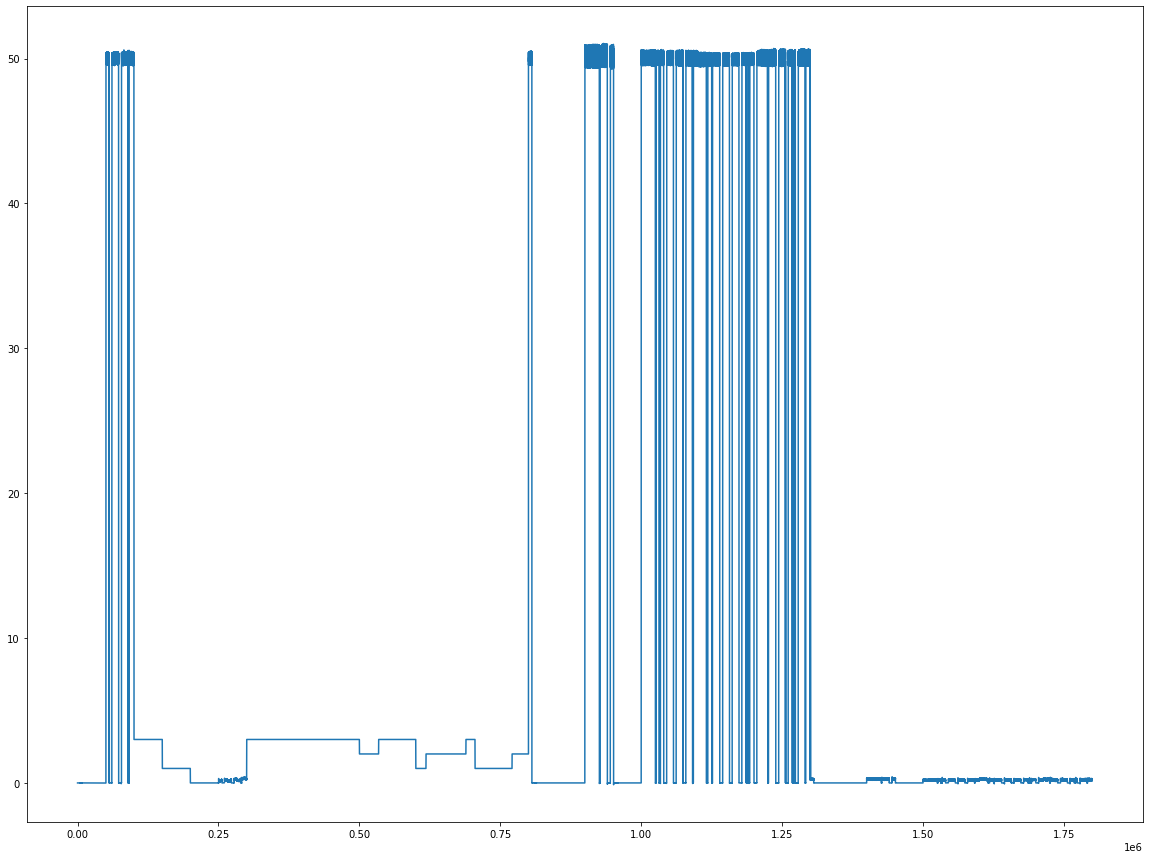

In [14]:
fig = plt.figure(figsize=(20,15))
plt.plot(df["value"])
# plt.ylim(48, 52)

## Find the headers in the middle of the file

In [15]:
df_2 = pd.read_csv(dataset_root_dir/"Auto Bild 3.trace.csv", sep=';', lineterminator='\n', header="infer",names=["0", "key", "value"])

In [16]:
# we can split the data by 0.Variable, 1.Variable and so on
variable_series = pd.Series(df_2["0"].str.contains('.Variable', regex=False).dropna())

In [17]:
variable_indices = variable_series[variable_series].index.tolist()
# append None to the list, so i can use it for the last chunck of the data
variable_indices+=[None]

In [18]:
df_dict = {}
for idx, (start, end) in enumerate(zip(variable_indices, variable_indices[1:])):
  df_dict[f"variable_{idx}"] = pd.DataFrame(df_2[start:end]).reset_index(drop=True)


In [19]:
df_dict["variable_0"][["0", "key"]][:14]

,0,key
0,0.Variable,SEW_GVL_Internal.Drive1_AxisDriver.DeviceAdap...
1,0.Address.AddrFlags,0x00000000\r
2,0.Class,15\r
3,0.Size,8\r
4,0.GraphColor,4278222848\r
5,0.GraphType,1\r
6,0.MinWarningColor,4278190080\r
7,0.MaxWarningColor,4294901760\r
8,0.CriticalLowerLimit,0\r
9,0.CriticalUpperLimit,0\r


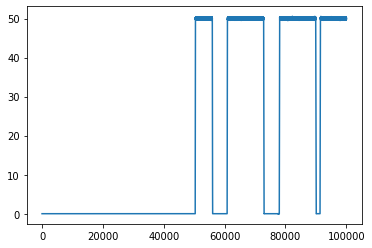

In [20]:
plt.plot(df_dict["variable_0"]["value"])

In [21]:
arr = []
header_dict = {}
for telemetry_key in df_dict:
    header_dict[telemetry_key] = df_dict[telemetry_key][["0", "key"]].values[0][1]
    arr.append(df_dict[telemetry_key][["0", "key"]].values[0][1])
header_dict

{'variable_0': ' SEW_GVL_Internal.Drive1_AxisDriver.DeviceAdapter16PD.stBasicOUT.lrActualVelocity\r',
 'variable_1': ' Main_ChangeMaster.fbChangeMasterDrive1._uiActiveMaster\r',
 'variable_10': ' SEW_GVL_Internal.Drive4_AxisDriver.DeviceAdapter16PD.stBasicOUT.lrActualVelocity\r',
 'variable_11': ' SEW_GVL_Internal.Drive5_AxisDriver.DeviceAdapter16PD.stBasicOUT.lrActualVelocity\r',
 'variable_12': ' SEW_GVL_Internal.Drive6_AxisDriver.DeviceAdapter16PD.stBasicOUT.lrActualVelocity\r',
 'variable_13': ' SEW_GVL_Internal.Drive2_AxisDriver.DeviceAdapter16PD.stInverterOUT.lrActualTorque\r',
 'variable_14': ' SEW_GVL_Internal.Drive3_AxisDriver.DeviceAdapter16PD.stInverterOUT.lrActualTorque\r',
 'variable_15': ' SEW_GVL_Internal.Drive4_AxisDriver.DeviceAdapter16PD.stInverterOUT.lrActualTorque\r',
 'variable_16': ' SEW_GVL_Internal.Drive5_AxisDriver.DeviceAdapter16PD.stInverterOUT.lrActualTorque\r',
 'variable_17': ' SEW_GVL_Internal.Drive6_AxisDriver.DeviceAdapter16PD.stInverterOUT.lrActualTorq

In [22]:
sort_varnames = [[1,0,2], [3,8,13], [4,9,14], [5,10,15],[6,11,16], [7,12,17]]
drives = []
filenames = {}
index = 0
for gear_index, velocity_index, torque_index in sort_varnames:
    drivename = f"drive{(index+1)}"
    drives.append({})
    drives[index]["name"] = drivename
    drives[index]["gear"] = df_dict["variable_"+str(gear_index)]
    drives[index]["velocity"] = df_dict["variable_"+str(velocity_index)]
    drives[index]["torque"] = df_dict["variable_"+str(torque_index)]
    filenames["variable_"+str(gear_index)] = drivename + "_gear"
    filenames["variable_"+str(velocity_index)] = drivename + "_velocity"
    filenames["variable_"+str(torque_index)] = drivename + "_torque"



    #table_df[drivename + "_gear"] = df_dict["variable_"+str(gear_index)]["value"].values[14:]
    #table_df[drivename + "_velocity"] = df_dict["variable_"+str(velocity_index)]["value"].values[14:]
    #table_df[drivename + "_torque"] = df_dict["variable_"+str(torque_index)]["value"].values[14:]

    index += 1


In [23]:
filenames

{'variable_0': 'drive1_velocity',
 'variable_1': 'drive1_gear',
 'variable_10': 'drive4_velocity',
 'variable_11': 'drive5_velocity',
 'variable_12': 'drive6_velocity',
 'variable_13': 'drive2_torque',
 'variable_14': 'drive3_torque',
 'variable_15': 'drive4_torque',
 'variable_16': 'drive5_torque',
 'variable_17': 'drive6_torque',
 'variable_2': 'drive1_torque',
 'variable_3': 'drive2_gear',
 'variable_4': 'drive3_gear',
 'variable_5': 'drive4_gear',
 'variable_6': 'drive5_gear',
 'variable_7': 'drive6_gear',
 'variable_8': 'drive2_velocity',
 'variable_9': 'drive3_velocity'}

## Save dataset to disk

### Save the cleaned dataset that has been separated by variable name (0, 1, 2 ... ) to disk

In [25]:
# # save the dataframes to csv
# cleaned_data_dir = project_root_dir / "cleaned_data"
# cleaned_data_dir.mkdir(parents=True, exist_ok=True)
# for k, v in df_dict.items():
#   with open(cleaned_data_dir / k, "w") as fout:
#     v[["0", "key"]][:14].to_csv(fout, index=False, header=["key", "value"])
#     # print(v[["key", "value"]][14:])
#     v[["key", "value"]][14:].to_csv(fout, index=False, header=False)

### Save the cleaned dataset that has been separated and grouped based on type (torque, velocity, gear) to disk

In [26]:

# # save the dataframes to csv
# cleaned_data_dir = project_root_dir / "cleaned_data2"
# cleaned_data_dir.mkdir(parents=True, exist_ok=True)
# for k, v in df_dict.items():
#   with open(f"{cleaned_data_dir}/{filenames[k]}.csv", "w") as fout:
#     v[["0", "key"]][:14].to_csv(fout, index=False, header=["key", "value"])
#     # print(v[["key", "value"]][14:])
#     v[["key", "value"]][14:].to_csv(fout, index=False, header=False)


### Save simulated anomalies of 90% higher and lower torque to disk

In [ ]:
# # save the dataframes to csv
# cleaned_data_dir = project_root_dir / "simulated_anomalies"
# cleaned_data_dir.mkdir(parents=True, exist_ok=True)
# for k, v in df_dict.items():
#   # check if this is a torque dataframe
#   column_name = [x for x in v.columns if "torque" in x]
#   # print(column_name)
#   if column_name:
#     # create 90% higher and lower readings to simulate the anomalies
#     v["high_value"] = v[column_name[0]].apply(lambda x: x + (x * 0.9))
#     v["low_value"] = v[column_name[0]].apply(lambda x: x - (x * 0.9))
#     # print(v[["high_value", "low_value"]])
  
#   with open(f"{cleaned_data_dir}/{filenames[k]}.csv", "w") as fout:
#     if column_name:
#       pd.DataFrame([], columns=["key", "value", "high_value", "low_value"]).to_csv(fout, index=False)
#     else:
#       pd.DataFrame([], columns=["key", "value"]).to_csv(fout, index=False)
#     v[["0", "key"]][:14].to_csv(fout, index=False, header=False)
#     # drop the 0 column and write everything else to file
#     v[v.columns.drop(['0'])][14:].to_csv(fout, index=False, header=False)
#     # print(v[v.columns.drop(['0'])][14:])


In [28]:

table_df = pd.DataFrame(columns=['key']) 
for k, v in df_dict.items():
    #v.columns = ["index"].join
    v.columns = ["0","key", filenames[k]]
    table_df = table_df.merge(v[["key", filenames[k]]][14:], on="key", how='outer')
    #break;
    
table_df = table_df.iloc[: , 0:]


cleaned_data_dir = project_root_dir
with open(f"{cleaned_data_dir}/total_data.csv", "w") as fout:
    table_df.to_csv(fout)
"""

"""

'\n\n'

In [29]:
df_dict["variable_0"]

,0,key,drive1_velocity
0,0.Variable,SEW_GVL_Internal.Drive1_AxisDriver.DeviceAdap...,NaN
1,0.Address.AddrFlags,0x00000000\r,NaN
2,0.Class,15\r,NaN
3,0.Size,8\r,NaN
4,0.GraphColor,4278222848\r,NaN
...,...,...,...
100009,NaN,518479862,50.08721
100010,NaN,518484870,50.16852
100011,NaN,518489864,50.05760
100012,NaN,518494859,50.01374


In [30]:
import os
os.chdir(project_root_dir / "cleaned_data2" )

In [31]:
ls

drive1_gear.csv      drive3_gear.csv      drive5_gear.csv
drive1_torque.csv    drive3_torque.csv    drive5_torque.csv
drive1_velocity.csv  drive3_velocity.csv  drive5_velocity.csv
drive2_gear.csv      drive4_gear.csv      drive6_gear.csv
drive2_torque.csv    drive4_torque.csv    drive6_torque.csv
drive2_velocity.csv  drive4_velocity.csv  drive6_velocity.csv


In [32]:
df

,key,value
0,18504866,-0.00002
1,18509861,0.00001
2,18514857,0.00002
3,18519857,-0.00001
4,18524866,0.00000
...,...,...
1800233,518479862,0.17000
1800234,518484870,0.15500
1800235,518489864,0.19500
1800236,518494859,0.21100


In [33]:
import numpy as np
for keyname in df_dict:
    b = []
    for element in df_dict[keyname].values[15:]:
        #temp = [float(num) for num in element]
        b.append(float(element[1].strip()))
    b = np.array(b)
    print(f"longest recording of telemetry: {filenames[keyname]} took: {b.max()/(60*60*1000)} minutes. ({b.max()} milliseconds)")

longest recording of telemetry: drive1_velocity took: 144.02773972222224 minutes. (518499863.0 milliseconds)
longest recording of telemetry: drive1_gear took: 144.02773972222224 minutes. (518499863.0 milliseconds)
longest recording of telemetry: drive1_torque took: 144.02773972222224 minutes. (518499863.0 milliseconds)
longest recording of telemetry: drive2_gear took: 144.02773972222224 minutes. (518499863.0 milliseconds)
longest recording of telemetry: drive3_gear took: 144.02773972222224 minutes. (518499863.0 milliseconds)
longest recording of telemetry: drive4_gear took: 144.02773972222224 minutes. (518499863.0 milliseconds)
longest recording of telemetry: drive5_gear took: 144.02773972222224 minutes. (518499863.0 milliseconds)
longest recording of telemetry: drive6_gear took: 144.02773972222224 minutes. (518499863.0 milliseconds)
longest recording of telemetry: drive2_velocity took: 144.02773972222224 minutes. (518499863.0 milliseconds)
longest recording of telemetry: drive3_veloci

In [35]:
files = sorted(list((project_root_dir / "cleaned_data2").glob("*.csv")))
for file in files:
  print(file)

/content/drive/My Drive/applied-data-hackathon/predictive-maintenance/cleaned_data2/drive1_gear.csv
/content/drive/My Drive/applied-data-hackathon/predictive-maintenance/cleaned_data2/drive1_torque.csv
/content/drive/My Drive/applied-data-hackathon/predictive-maintenance/cleaned_data2/drive1_velocity.csv
/content/drive/My Drive/applied-data-hackathon/predictive-maintenance/cleaned_data2/drive2_gear.csv
/content/drive/My Drive/applied-data-hackathon/predictive-maintenance/cleaned_data2/drive2_torque.csv
/content/drive/My Drive/applied-data-hackathon/predictive-maintenance/cleaned_data2/drive2_velocity.csv
/content/drive/My Drive/applied-data-hackathon/predictive-maintenance/cleaned_data2/drive3_gear.csv
/content/drive/My Drive/applied-data-hackathon/predictive-maintenance/cleaned_data2/drive3_torque.csv
/content/drive/My Drive/applied-data-hackathon/predictive-maintenance/cleaned_data2/drive3_velocity.csv
/content/drive/My Drive/applied-data-hackathon/predictive-maintenance/cleaned_data